In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from mlxtend.plotting import scatterplotmatrix
import numpy as np

In [3]:
dataset = pd.read_csv('./District/NumberingDistrict.csv')
dataset.head()

,district,land_shift_area,complete_year,building_shift_total_area,num_room,num_hall,num_toilet,num_partition,management_org,total_ntd,unit_ntd,carpark_shift_area,carpark_ntd,transaction_year,transaction_month,building_age,number_of_land,number_of_building,number_of_carpark
0,10,4.00,0.0000,0.00,0,0,0,1,0,1600000.0,400000.000000,0.0,0,2019,10,2019.0000,1,0,0
1,1,40.75,62.0625,109.36,4,0,4,1,0,11850000.0,108357.717630,0.0,0,2019,10,1956.9375,1,1,0
2,1,33.81,69.0000,109.42,3,2,2,1,0,10000000.0,91390.970572,0.0,0,2019,10,1950.0000,2,1,0
3,1,32.19,84.0000,163.53,3,2,2,1,1,21000000.0,128416.804256,0.0,0,2019,4,1935.0000,1,1,1
4,1,60.25,108.0000,204.79,3,2,3,1,1,67203400.0,328157.624884,0.0,0,2019,10,1911.0000,1,1,0


In [4]:
# Delete outliers
dataset = dataset[dataset['unit_ntd'] > 0]
delete = dataset[((dataset.unit_ntd > 3000000) |
                  (dataset.total_ntd > 900000000) |
                  (dataset.transaction_year < 2019) |
                  (dataset.land_shift_area <= 0)
                 )].index
dataset = dataset.drop(delete)
dataset.head()

,district,land_shift_area,complete_year,building_shift_total_area,num_room,num_hall,num_toilet,num_partition,management_org,total_ntd,unit_ntd,carpark_shift_area,carpark_ntd,transaction_year,transaction_month,building_age,number_of_land,number_of_building,number_of_carpark
0,10,4.00,0.0000,0.00,0,0,0,1,0,1600000.0,400000.000000,0.0,0,2019,10,2019.0000,1,0,0
1,1,40.75,62.0625,109.36,4,0,4,1,0,11850000.0,108357.717630,0.0,0,2019,10,1956.9375,1,1,0
2,1,33.81,69.0000,109.42,3,2,2,1,0,10000000.0,91390.970572,0.0,0,2019,10,1950.0000,2,1,0
3,1,32.19,84.0000,163.53,3,2,2,1,1,21000000.0,128416.804256,0.0,0,2019,4,1935.0000,1,1,1
4,1,60.25,108.0000,204.79,3,2,3,1,1,67203400.0,328157.624884,0.0,0,2019,10,1911.0000,1,1,0


In [8]:
columns = []
for key in dataset:
    if((key != 'unit_ntd')):
        columns.append(key)
columns.append('unit_ntd')
print(columns)

['district', 'land_shift_area', 'complete_year', 'building_shift_total_area', 'num_room', 'num_hall', 'num_toilet', 'num_partition', 'management_org', 'total_ntd', 'carpark_shift_area', 'carpark_ntd', 'transaction_year', 'transaction_month', 'building_age', 'number_of_land', 'number_of_building', 'number_of_carpark', 'unit_ntd']


<ipython-input-9-a45054d9a47a>:3: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  plt.tight_layout()


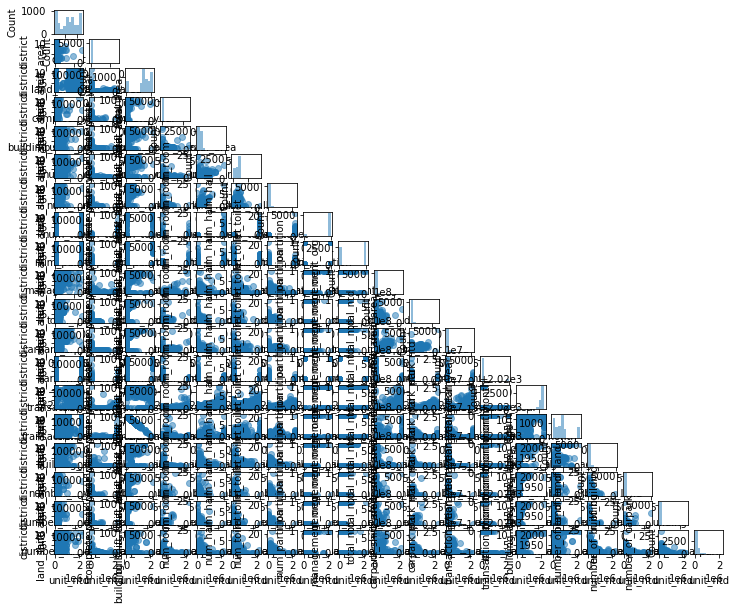

In [9]:
# Show scatter diagram
scatterplotmatrix(dataset[columns].values, figsize = (12, 10), names = columns, alpha = 0.5)
plt.tight_layout()
plt.show()

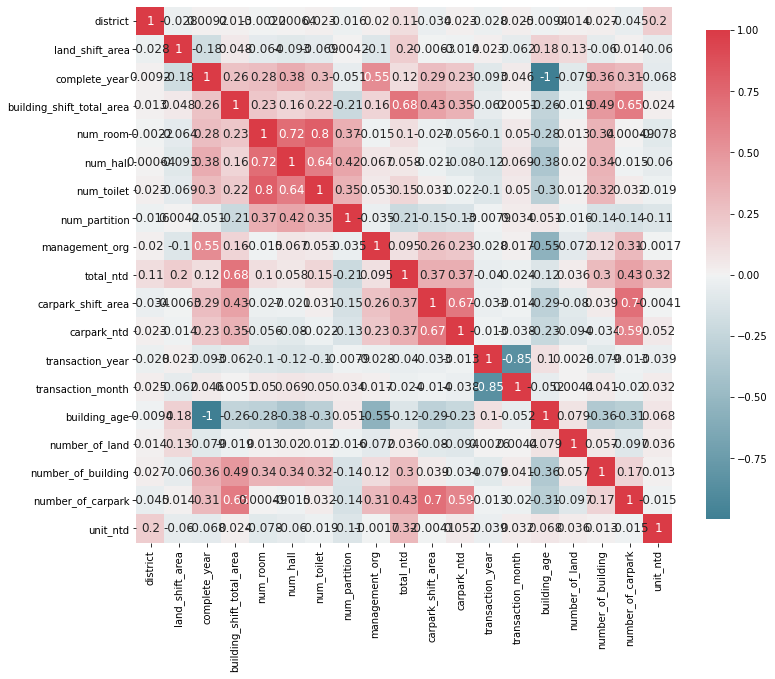

In [10]:
# Show heatmap
hm, ax = plt.subplots(figsize=(12,10))
corr = dataset[columns].corr(method='pearson')
cmap = sns.diverging_palette(220, 10, as_cmap=True)
hm = sns.heatmap(
    corr,
    cmap = cmap,
    square = True,
    cbar_kws={'shrink': .9},
    ax = ax,
    annot = True,
    annot_kws = {'fontsize': 12}
)
plt.show()